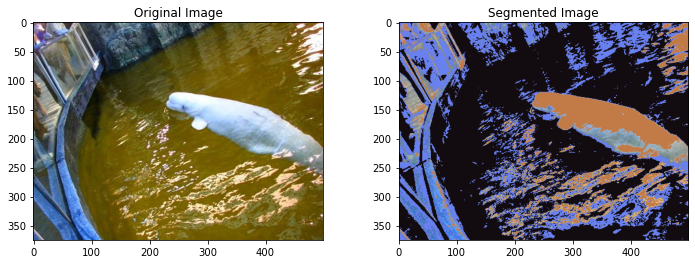

In [5]:
input_img_path = "images/ADE_train_00001493.jpg"

import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Load the input image
img = cv2.imread(input_img_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Flatten the image into a feature vector
X = gray.flatten().reshape(-1, 1)

# Use K-Means clustering to divide the image into 4 clusters
kmeans = KMeans(n_clusters=4).fit(X)

# Create a copy of the original image
segmented_img = img.copy()

# Loop through the clusters and color each one separately
for i in range(3):
    segmented_img[kmeans.labels_.reshape(img.shape[:2]) == i] = np.random.randint(0, 256, size=3)

# Display the original and segmented images
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title("Segmented Image")
plt.show()

Text(0.5, 1.0, 'Ground Truth Image')

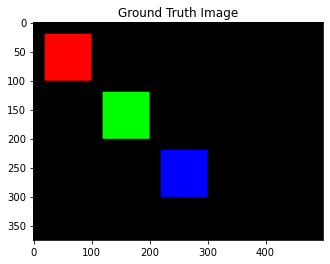

In [6]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("images/ADE_train_00001493.jpg")

# Create a blank image with the same size as the original image
ground_truth = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

x1, y1, x2, y2 = 10, 10, 50, 50
x3, y3, x4, y4 = 60, 60, 100, 100
x5, y5, x6, y6 = 110, 110, 150, 150

coords = [x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6]

for i in range(len(coords)):
    coords[i] = coords[i]*2

x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6 = coords

# Define the regions of interest using coordinates
# and color them with a unique color
cv2.rectangle(ground_truth, (x1, y1), (x2, y2), (255, 0, 0), -1)
cv2.rectangle(ground_truth, (x3, y3), (x4, y4), (0, 255, 0), -1)
cv2.rectangle(ground_truth, (x5, y5), (x6, y6), (0, 0, 255), -1)

# Save the ground truth image to a file
cv2.imwrite("images/ground_truth2.png", ground_truth)

# Display the original and segmented images
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(ground_truth, cmap="gray")
plt.title("Ground Truth Image")

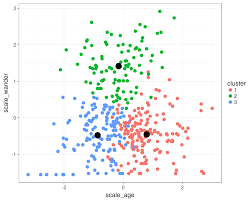

In [88]:
# image_source: https://rpubs.com/cyobero/k-means
from IPython.display import Image
Image(filename="illustrative_images/kmeans.png")

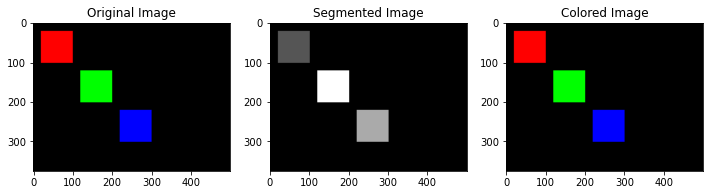

In [76]:
import cv2
from sklearn.cluster import KMeans

# Load the ground truth image
ground_truth = cv2.imread("images/ground_truth2.png")

# Convert the image to a feature space
# Here we flatten the image into a 2D array
features = ground_truth.reshape((-1,3))

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)

# Assign each pixel in the original image to the cluster it belongs to
segmented_image = kmeans.predict(features)
segmented_image = segmented_image.reshape((ground_truth.shape[0], ground_truth.shape[1]))

# Visualize the results by coloring each cluster with a unique color
colored_image = np.zeros((ground_truth.shape[0], ground_truth.shape[1], 3), dtype=np.uint8)
colored_image[segmented_image == 0] = (0, 0, 0)
colored_image[segmented_image == 1] = (255, 0, 0)
colored_image[segmented_image == 2] = (0, 0, 255)
colored_image[segmented_image == 3] = (0, 255, 0)

# Display the original and thresholded images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(ground_truth)
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(segmented_image, cmap="gray")
plt.title("Segmented Image")
plt.subplot(1, 3, 3)
plt.imshow(colored_image, cmap="gray")
plt.title("Colored Image")
plt.show()

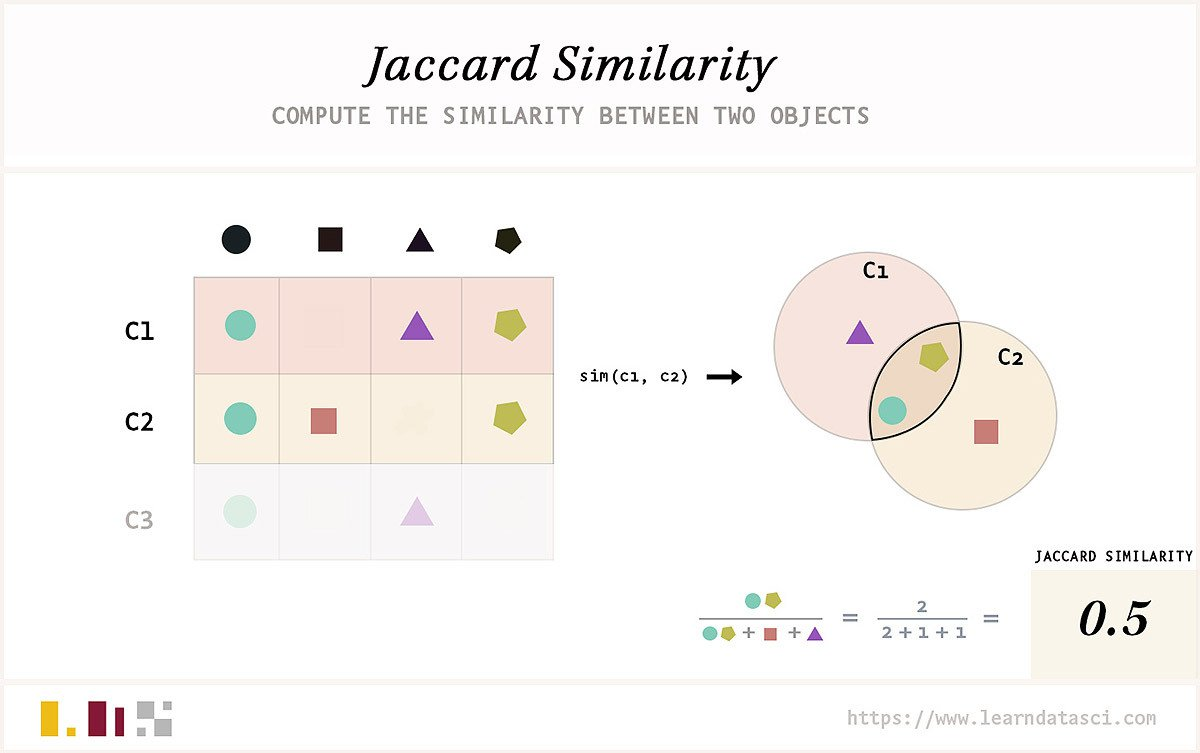

In [92]:
# image_source: https://www.learndatasci.com/glossary/jaccard-similarity/#:~:text=The%20Jaccard%20similarity%20measures%20the,of%20observations%20in%20either%20set.
from IPython.display import Image
Image(filename="illustrative_images/jaccard.jpg")

In [77]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

# Convert Images (x,y,3) to 1D Arrays
y_true = ground_truth.reshape(-1)
y_pred = colored_image.reshape(-1)

# Jaccard Similarity Coefficient (JSC)
jsc = jaccard_score(y_true, y_pred, average="weighted")

# Rand Index (RI)
ri = adjusted_rand_score(y_true, y_pred)

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(y_true, y_pred)

#print the result
print("Jaccard Similarity Coefficient (JSC): ", jsc)
print("Rand Index (RI): ", ri)
print("Normalized Mutual Information (NMI): ", nmi)

Jaccard Similarity Coefficient (JSC):  1.0
Rand Index (RI):  1.0
Normalized Mutual Information (NMI):  1.0


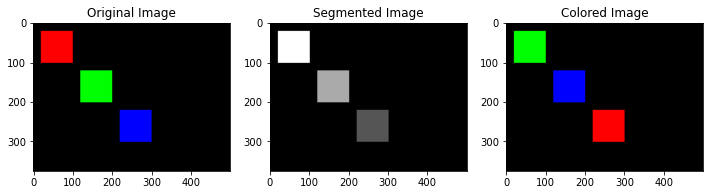

In [78]:
import cv2
from sklearn.cluster import KMeans

# Load the ground truth image
ground_truth = cv2.imread("images/ground_truth2.png")

# Convert the image to a feature space
# Here we flatten the image into a 2D array
features = ground_truth.reshape((-1,3))

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)

# Assign each pixel in the original image to the cluster it belongs to
segmented_image = kmeans.predict(features)
segmented_image = segmented_image.reshape((ground_truth.shape[0], ground_truth.shape[1]))

# Visualize the results by coloring each cluster with a unique color
colored_image = np.zeros((ground_truth.shape[0], ground_truth.shape[1], 3), dtype=np.uint8)
colored_image[segmented_image == 0] = (0, 0, 0)
colored_image[segmented_image == 1] = (255, 0, 0)
colored_image[segmented_image == 2] = (0, 0, 255)
colored_image[segmented_image == 3] = (0, 255, 0)

# Display the original and thresholded images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(ground_truth)
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(segmented_image, cmap="gray")
plt.title("Segmented Image")
plt.subplot(1, 3, 3)
plt.imshow(colored_image, cmap="gray")
plt.title("Colored Image")
plt.show()

In [79]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

# Convert Images (x,y,3) to 1D Arrays
y_true = ground_truth.reshape(-1)
y_pred = colored_image.reshape(-1)

# Jaccard Similarity Coefficient (JSC)
jsc = jaccard_score(y_true, y_pred, average="weighted")

# Rand Index (RI)
ri = adjusted_rand_score(y_true, y_pred)

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(y_true, y_pred)

#print the result
print("Jaccard Similarity Coefficient (JSC): ", jsc)
print("Rand Index (RI): ", ri)
print("Normalized Mutual Information (NMI): ", nmi)

Jaccard Similarity Coefficient (JSC):  0.897472880128
Rand Index (RI):  -0.03353949874103336
Normalized Mutual Information (NMI):  0.008366633878351043


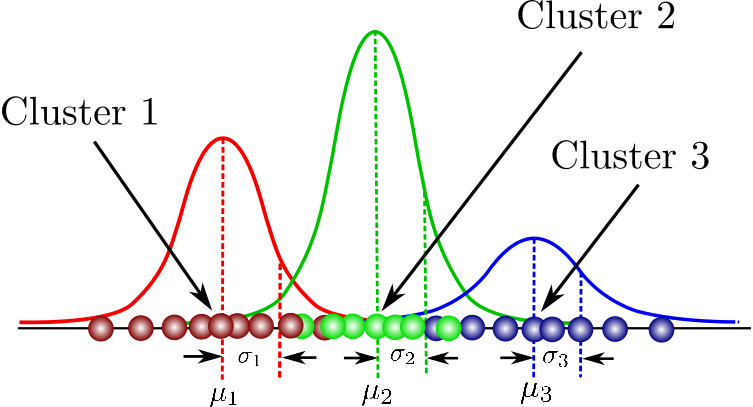

In [89]:
# image_source: https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95
from IPython.display import Image
Image(filename="illustrative_images/gaussianmixture.png")

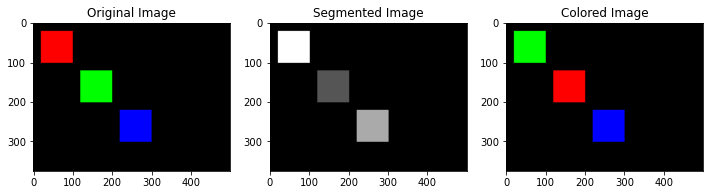

In [86]:
import cv2
from sklearn.mixture import GaussianMixture

# Load the ground truth image
ground_truth = cv2.imread("images/ground_truth2.png")

# Convert the image to a feature space
# Here we flatten the image into a 2D array
features = ground_truth.reshape((-1,3))

# Apply Gaussian Mixture Model Clustering
num_clusters = 4
gmm = GaussianMixture(n_components=num_clusters)
gmm.fit(features)

# Assign each pixel in the original image to the cluster it belongs to
segmented_image = gmm.predict(features)
segmented_image = segmented_image.reshape((ground_truth.shape[0], ground_truth.shape[1]))

# Visualize the results by coloring each cluster with a unique color
colored_image = np.zeros((ground_truth.shape[0], ground_truth.shape[1], 3), dtype=np.uint8)
colored_image[segmented_image == 0] = (0, 0, 0)
colored_image[segmented_image == 1] = (255, 0, 0)
colored_image[segmented_image == 2] = (0, 0, 255)
colored_image[segmented_image == 3] = (0, 255, 0)

# Display the original and thresholded images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(ground_truth)
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(segmented_image, cmap="gray")
plt.title("Segmented Image")
plt.subplot(1, 3, 3)
plt.imshow(colored_image, cmap="gray")
plt.title("Colored Image")
plt.show()

In [87]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

# Convert Images (x,y,3) to 1D Arrays
y_true = ground_truth.reshape(-1)
y_pred = colored_image.reshape(-1)

# Jaccard Similarity Coefficient (JSC)
jsc = jaccard_score(y_true, y_pred, average="weighted")

# Rand Index (RI)
ri = adjusted_rand_score(y_true, y_pred)

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(y_true, y_pred)

#print the result
print("Jaccard Similarity Coefficient (JSC): ", jsc)
print("Rand Index (RI): ", ri)
print("Normalized Mutual Information (NMI): ", nmi)

Jaccard Similarity Coefficient (JSC):  0.9264516359845234
Rand Index (RI):  0.29369051723284206
Normalized Mutual Information (NMI):  0.1287725501551811
